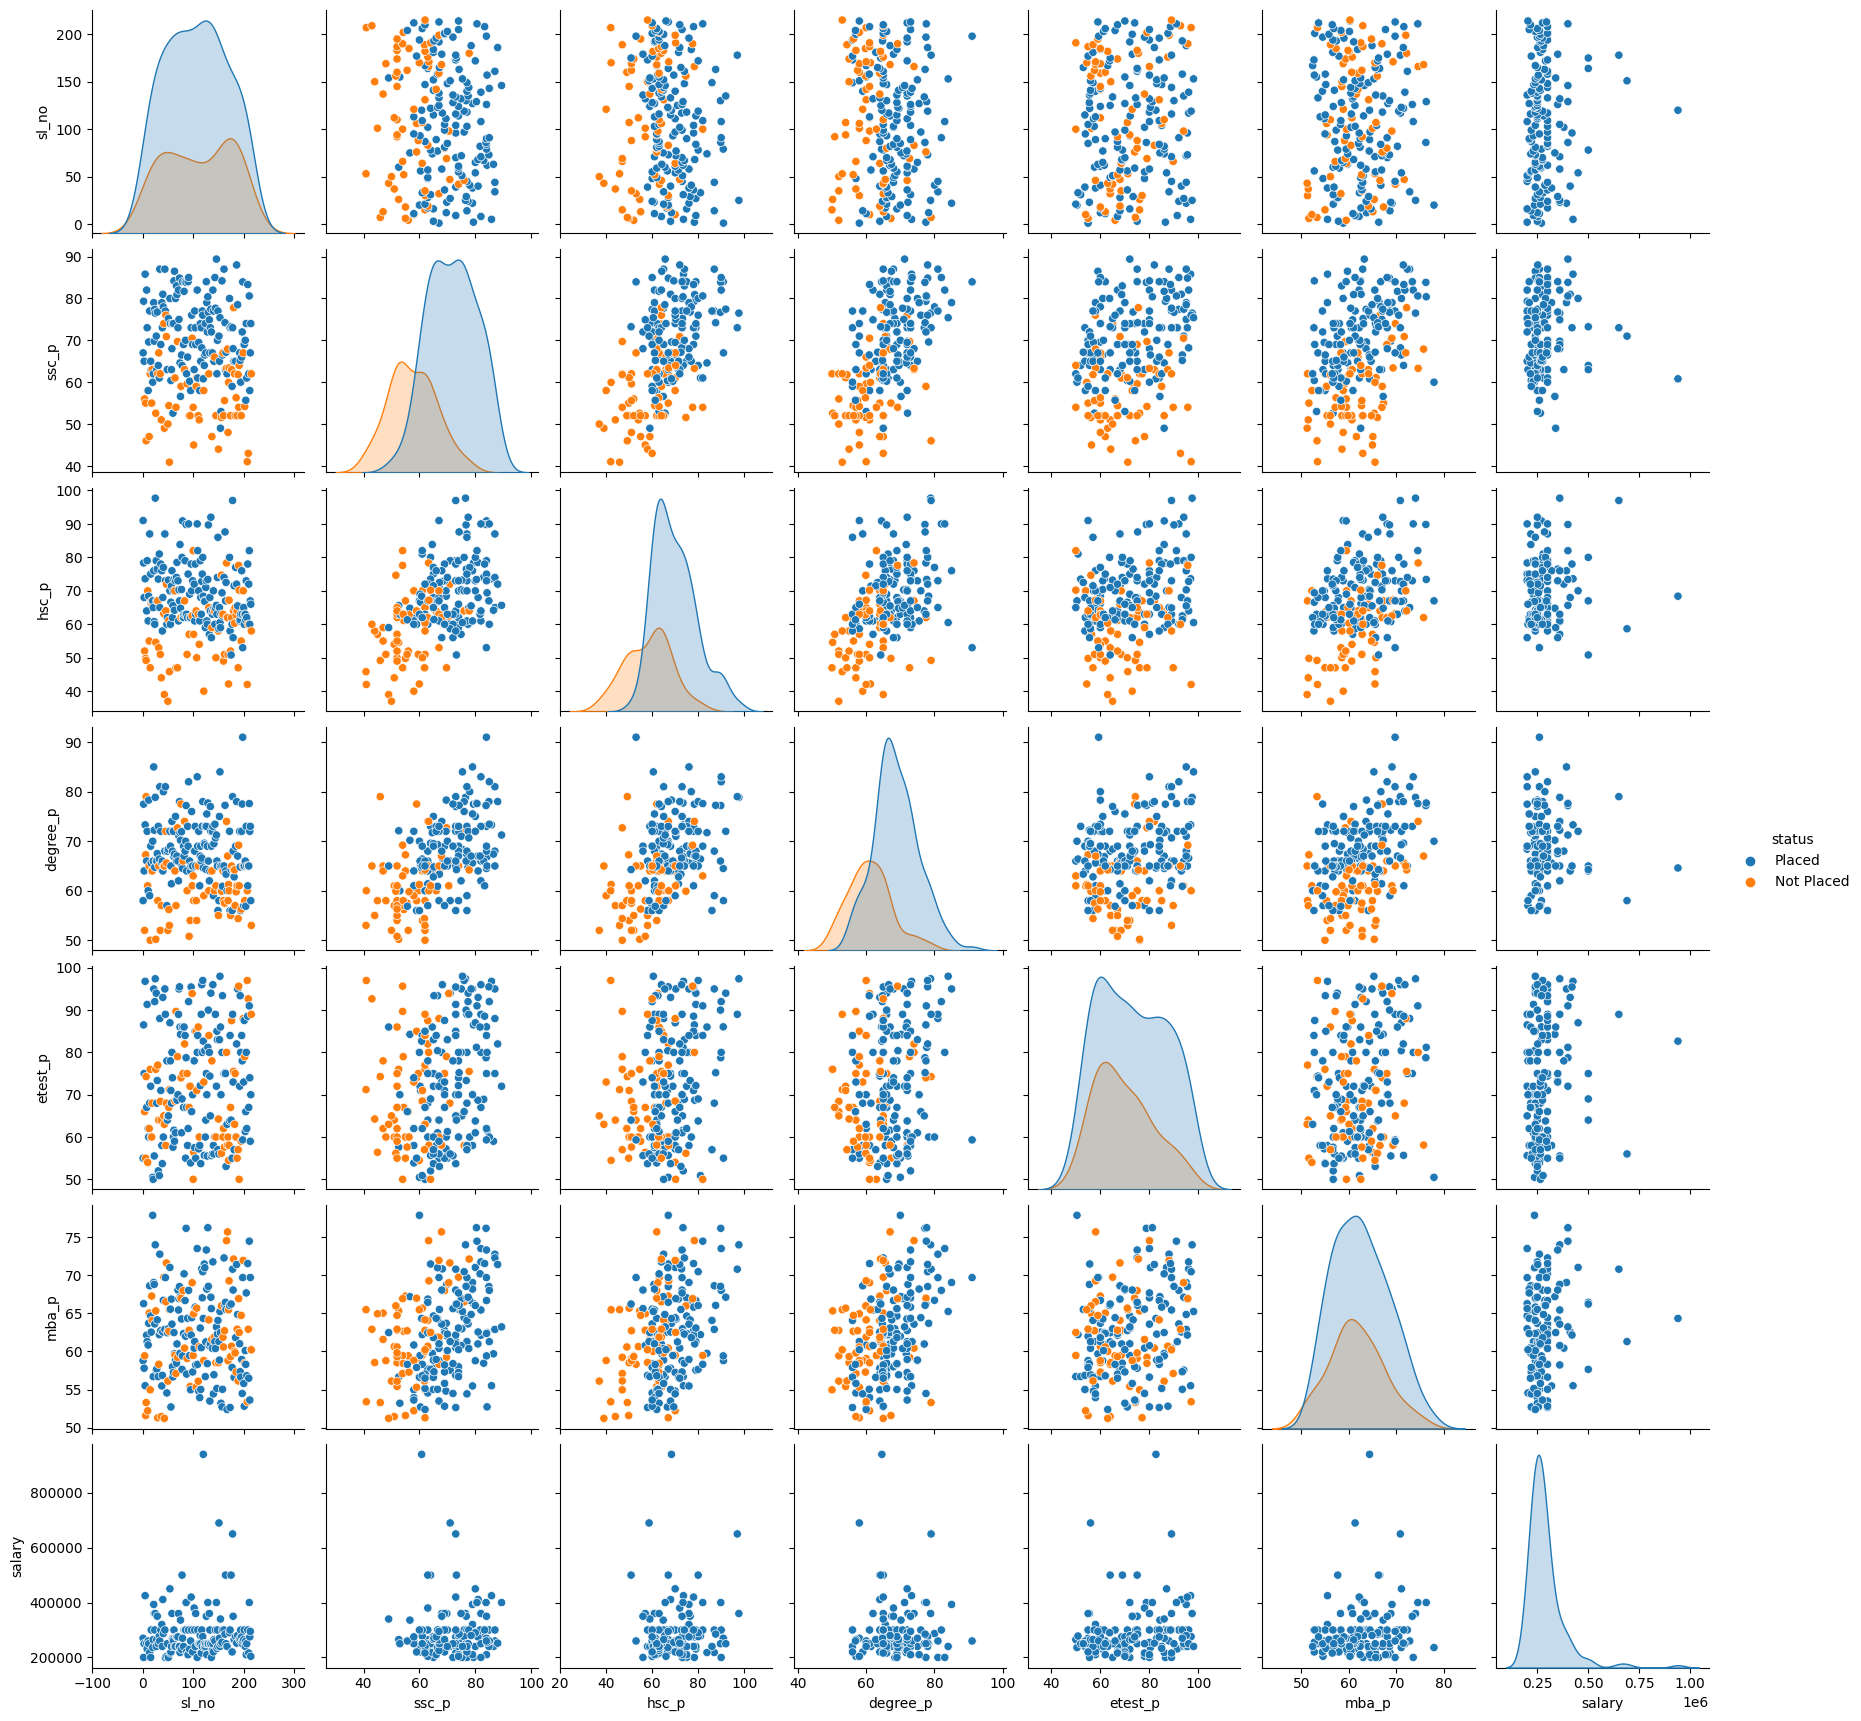

SVM Accuracy: 0.8837209302325582
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



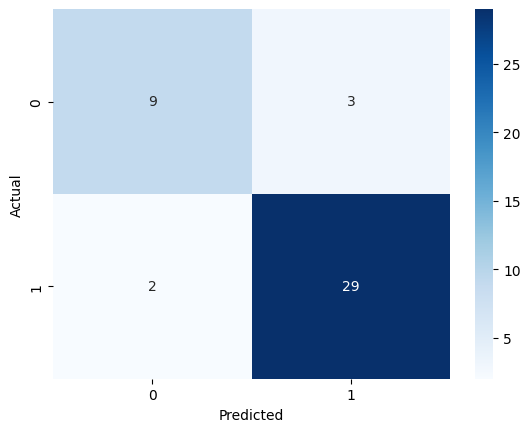

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = pd.read_csv('/content/Placement_Data_Full_Class.csv')  # Replace with the actual file path
sns.pairplot(data, hue='status')
plt.show()
label_encoder = LabelEncoder()
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
data['salary'].fillna(0, inplace=True)
X = data.drop(['sl_no', 'status', 'salary'], axis=1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5)
svm_grid_search.fit(X_train_scaled, y_train)

best_svm_model = svm_grid_search.best_estimator_
svm_y_pred = best_svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)

print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))
conf_matrix = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
